# Import Necessary Library

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# 1.Data Collection

In [3]:
turbine = pd.read_csv('gas_turbines (1).csv')
turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# Data Understanding

In [4]:
turbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
turbine.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
turbine.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

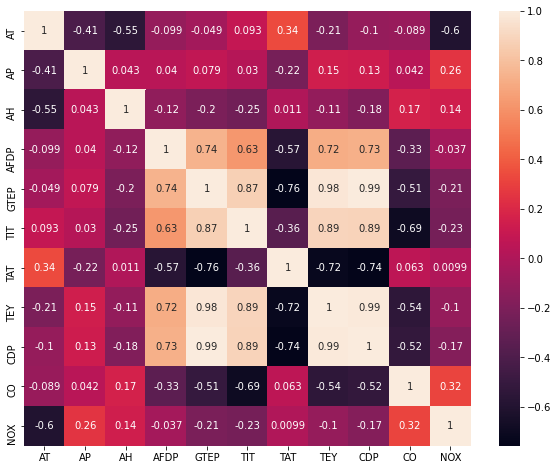

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,8))
sns.heatmap(turbine.corr(),annot=True,)

# 3.Data Preparation

In [11]:
X = turbine.drop('TEY',axis = 1)
y = turbine[['TEY']]

In [12]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=12,test_size=.20)

In [15]:
X_train.shape,y_train.shape

((12031, 10), (12031, 1))

In [16]:
X_test.shape,y_test.shape

((3008, 10), (3008, 1))

# 4.Model Building

#### Build the Architechure

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [54]:
model = Sequential()
model.add(Dense(units = 100,input_dim = 10,kernel_initializer = 'uniform' ,activation = 'relu'))
model.add((Dropout(0.1)))
model.add(Dense(units = 60,kernel_initializer = 'uniform',activation = 'relu'))
model.add((Dropout(0.2)))
model.add(Dense(units = 60,kernel_initializer = 'uniform',activation = 'relu'))
model.add((Dropout(0.01)))
model.add(Dense(units = 1,kernel_initializer = 'uniform',activation = 'linear'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               1100      
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 60)                6060      
                                                                 
 dropout_14 (Dropout)        (None, 60)                0         
                                                                 
 dense_22 (Dense)            (None, 60)                3660      
                                                                 
 dropout_15 (Dropout)        (None, 60)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                

### Complie the architechure

In [55]:
model.compile(optimizer='adam',loss='mean_absolute_error', metrics='accuracy',)

# 5.Model Training

In [62]:
model.fit(x=X_train,y=y_train,batch_size=20,epochs=50,validation_split=.30)

Epoch 1/50
422/422 [==============================] - 1s 2ms/step - loss: 2.9026 - accuracy: 0.0000e+00 - val_loss: 2.1752 - val_accuracy: 0.0000e+00
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 2.9170 - accuracy: 0.0000e+00 - val_loss: 1.5986 - val_accuracy: 0.0000e+00
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 2.7965 - accuracy: 0.0000e+00 - val_loss: 1.2373 - val_accuracy: 0.0000e+00
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 2.8358 - accuracy: 0.0000e+00 - val_loss: 1.2071 - val_accuracy: 0.0000e+00
Epoch 5/50
422/422 [==============================] - 1s 2ms/step - loss: 2.8005 - accuracy: 0.0000e+00 - val_loss: 1.7898 - val_accuracy: 0.0000e+00
Epoch 6/50
422/422 [==============================] - 1s 2ms/step - loss: 2.7921 - accuracy: 0.0000e+00 - val_loss: 1.1413 - val_accuracy: 0.0000e+00
Epoch 7/50
422/422 [==============================] - 1s 1ms/step - loss: 2.7655 - accuracy: 0.0000e

In [57]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy:',(accuracy*100))

376/376 [==============================] - 0s 843us/step - loss: 0.8398 - accuracy: 0.0000e+00
Accuracy: 0.0


#### Tuning of Hyperparameters :
##### Hyperparameters all at once
**The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.**
#### This process is computationally expensive.

In [68]:
# Define the grid search parameters

batch_size = [10,20,30]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [100,60,30]
neuron2 = [80,60,25]

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

from tensorflow.keras.optimizers import Adam

In [66]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mean_absolute_error',optimizer = adam,metrics = ['accuracy'])
    return model



In [67]:
# Create the model
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = create_model)

In [71]:
# Build and fit the GridSearchCV
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = 5,verbose = 10)
grid_result = grid.fit(X_scaled,y)

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=100, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1587.4773 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1587.4750 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 969us/step - loss: 1587.4752 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 890us/step - loss: 1587.4761 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 893us/step - loss: 1587.4763 - accuracy: 8.3119e-05 0s - loss: 1590.4236 - accuracy: 0.
Epoch 6/10
1204/1204 [==============================] - 1s 882us/step - loss: 1587.4758 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 877us/step - loss: 158

1204/1204 [==============================] - 2s 1ms/step - loss: 1585.9081 - accuracy: 8.3119e-05A: 0s - loss: 1593.6908 - ac
Epoch 2/10
1204/1204 [==============================] - 1s 946us/step - loss: 1582.5485 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 928us/step - loss: 1579.4185 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 986us/step - loss: 1576.8600 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 982us/step - loss: 1574.4177 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1572.0055 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1569.6021 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 964us/step - loss: 1567.2007 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 935us/step - loss: 1564.8041 - accuracy: 8

1204/1204 [==============================] - 1s 799us/step - loss: 1587.4757 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 880us/step - loss: 1587.4773 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 931us/step - loss: 1587.4771 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 807us/step - loss: 1587.4768 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1587.4771 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1587.4773 - accuracy: 8.3119e-05A: 0s - loss: 1586.0267 - accurac
Epoch 9/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1587.4771 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 751us/step - loss: 1724.7826 - accuracy: 0.0000e+00
[CV 1/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, ini

Epoch 7/10
1204/1204 [==============================] - 1s 875us/step - loss: 1587.4767 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 877us/step - loss: 1587.4779 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 907us/step - loss: 1587.4763 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 820us/step - loss: 1724.7826 - accuracy: 0.0000e+00
[CV 1/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=60, neuron2=80; total time=  12.0s
[CV 2/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=60, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1724.5417 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1721.0669 - accuracy: 8.3119e-05
Epoch 3/10
12

1204/1204 [==============================] - 1s 1ms/step - loss: 1564.8481 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 876us/step - loss: 1698.5728 - accuracy: 0.0000e+00
[CV 1/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=60, neuron2=60; total time=  12.6s
[CV 2/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=60, neuron2=60
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1726.0571 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 938us/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 929us/step - loss: 1726.0590 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 880us/step - loss: 1726.0585 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==

301/301 [==============================] - 0s 839us/step - loss: 1724.7826 - accuracy: 0.0000e+00
[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=60, neuron2=25; total time=  12.1s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=60, neuron2=25
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1726.0580 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1726.0592 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 916us/step - loss: 1726.0590 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 859us/step - loss: 1726.0577 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 872us/step - loss: 1726.0587 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [===

Epoch 1/10
1204/1204 [==============================] - 1s 876us/step - loss: 1726.0587 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 822us/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 855us/step - loss: 1726.0587 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 873us/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 911us/step - loss: 1726.0590 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 877us/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 882us/step - loss: 1726.0580 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 901us/step - loss: 1726.0587 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 853us/step - loss: 1726.0570 - accuracy: 8.3119e-05
E

1204/1204 [==============================] - 1s 978us/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1726.0577 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1726.0602 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 937us/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 979us/step - loss: 1726.0580 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 778us/step - loss: 1375.3484 - accuracy: 0.0000e+00
[CV 2/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=30, neuron2=60; total time=  13.0s
[CV 3/5; 8/8748] START activation_function=softmax, batch_size=10, dr

1204/1204 [==============================] - 1s 1ms/step - loss: 1706.0541 - accuracy: 8.3119e-05A: 0s - loss: 1710.6328 - accuracy
Epoch 9/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1703.6576 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 1ms/step - loss: 1349.3223 - accuracy: 0.0000e+00
[CV 2/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=30, neuron2=25; total time=  14.1s
[CV 3/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=30, neuron2=25
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1573.0291 - accuracy: 0.0000e+00
Epoch 2/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1569.6436 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1566.8524 - accuracy: 8.3119e-0

301/301 [==============================] - 0s 797us/step - loss: 1133.1256 - accuracy: 0.0000e+00
[CV 2/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=100, neuron2=80; total time=  12.5s
[CV 3/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=100, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1559.4968 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 914us/step - loss: 1534.1892 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 950us/step - loss: 1510.4819 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 958us/step - loss: 1487.1079 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 981us/step - loss: 1463.9578 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 

Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1559.6222 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 988us/step - loss: 1534.4078 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1510.6946 - accuracy: 8.3119e-05A: 0s - loss: 1502.3234 - accur
Epoch 4/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1487.3118 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1464.1366 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 987us/step - loss: 1441.0688 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 992us/step - loss: 1418.1184 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 893us/step - loss: 1395.3236 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 939us/step - loss: 1372.7104 -

1204/1204 [==============================] - 1s 945us/step - loss: 1488.2712 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 953us/step - loss: 1465.1119 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 969us/step - loss: 1442.0492 - accuracy: 8.3119e-05 0s - loss: 1436.8678 - accura
Epoch 7/10
1204/1204 [==============================] - 1s 841us/step - loss: 1419.1001 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 913us/step - loss: 1396.2969 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 951us/step - loss: 1373.6799 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 848us/step - loss: 1660.3907 - accuracy: 0.0000e+00
[CV 3/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=100, neuron2=25; total time=  13.5s
[CV 4/5; 12/8748] START activati

1204/1204 [==============================] - 1s 1ms/step - loss: 1463.8314 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1440.7778 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1417.8286 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1395.0339 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1372.4255 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 951us/step - loss: 1659.2993 - accuracy: 0.0000e+00
[CV 3/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=60, neuron2=80; total time=  13.4s
[CV 4/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=60, neuron2=80
Epoch 1/10
1204/1204 [========

1204/1204 [==============================] - 1s 843us/step - loss: 1574.6395 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 936us/step - loss: 1574.6377 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 856us/step - loss: 1894.2913 - accuracy: 0.0000e+00
[CV 3/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=60, neuron2=60; total time=  11.9s
[CV 4/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=60, neuron2=60
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1606.6493 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 943us/step - loss: 1606.6501 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 921us/step - loss: 1606.6493 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [

301/301 [==============================] - 0s 750us/step - loss: 1660.4305 - accuracy: 0.0000e+00
[CV 3/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=60, neuron2=25; total time=  11.7s
[CV 4/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=60, neuron2=25
Epoch 1/10
1204/1204 [==============================] - 1s 909us/step - loss: 1606.6505 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 950us/step - loss: 1606.6484 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 968us/step - loss: 1606.6498 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 946us/step - loss: 1606.6501 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 891us/step - loss: 1606.6498 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 

1204/1204 [==============================] - 2s 1ms/step - loss: 1606.6509 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 856us/step - loss: 1606.6492 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 852us/step - loss: 1606.6492 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 963us/step - loss: 1606.6495 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 904us/step - loss: 1606.6488 - accuracy: 8.3119e-05 0s - loss: 1609.2537 - accura
Epoch 6/10
1204/1204 [==============================] - 1s 894us/step - loss: 1606.6510 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 841us/step - loss: 1606.6500 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 842us/step - loss: 1606.6498 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 879us/step - loss: 1606.6484 - accur

1204/1204 [==============================] - 1s 1ms/step - loss: 1519.0406 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 962us/step - loss: 1495.7488 - accuracy: 8.3119e-05 0s - loss: 1498.6343 - accurac
Epoch 6/10
1204/1204 [==============================] - 1s 912us/step - loss: 1472.5692 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 938us/step - loss: 1449.5510 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 865us/step - loss: 1426.7501 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 847us/step - loss: 1404.2209 - accuracy: 8.3119e-05 0s - loss: 1407.4432 - accuracy: 9.2251e
Epoch 10/10
301/301 [==============================] - 0s 812us/step - loss: 1425.5634 - accuracy: 0.0000e+00
[CV 4/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=30, neuron2=60; total time= 

1204/1204 [==============================] - 1s 914us/step - loss: 1606.6498 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 855us/step - loss: 1606.6495 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 823us/step - loss: 1606.6490 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 860us/step - loss: 1606.6484 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 745us/step - loss: 1661.7108 - accuracy: 0.0000e+00
[CV 4/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=30, neuron2=25; total time=  11.7s
[CV 5/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=30, neuron2=25
Epoch 1/10
1204/1204 [==============================] - 1s 966us/step - loss: 1596.6663 - accuracy: 8.3112e-05
Epoch 2/10
1204/1204

1204/1204 [==============================] - 1s 915us/step - loss: 611.2283 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 794us/step - loss: 613.1855 - accuracy: 0.0000e+00
[CV 4/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=100, neuron2=80; total time=  12.9s
[CV 5/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=100, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1486.2101 - accuracy: 8.3112e-05
Epoch 2/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1276.3823 - accuracy: 8.3112e-05
Epoch 3/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1124.7028 - accuracy: 8.3112e-05
Epoch 4/10
1204/1204 [==============================] - 1s 1ms/step - loss: 992.1636 - accuracy: 8.3112e-05
Epoch 5/10
1204/1204 [=========

Epoch 1/10
1204/1204 [==============================] - 1s 904us/step - loss: 1487.4631 - accuracy: 8.3112e-05
Epoch 2/10
1204/1204 [==============================] - 1s 860us/step - loss: 1278.2184 - accuracy: 8.3112e-05
Epoch 3/10
1204/1204 [==============================] - 1s 899us/step - loss: 1126.0282 - accuracy: 8.3112e-05
Epoch 4/10
1204/1204 [==============================] - 1s 934us/step - loss: 992.9678 - accuracy: 8.3112e-05
Epoch 5/10
1204/1204 [==============================] - 1s 1ms/step - loss: 867.4464 - accuracy: 8.3112e-05
Epoch 6/10
1204/1204 [==============================] - 1s 940us/step - loss: 752.0052 - accuracy: 8.3112e-05
Epoch 7/10
1204/1204 [==============================] - 1s 902us/step - loss: 652.6782 - accuracy: 8.3112e-05
Epoch 8/10
1204/1204 [==============================] - 1s 880us/step - loss: 613.2628 - accuracy: 8.3112e-05
Epoch 9/10
1204/1204 [==============================] - 1s 835us/step - loss: 612.4073 - accuracy: 8.3112e-05
Epoch 10/

1204/1204 [==============================] - 1s 1ms/step - loss: 1611.2379 - accuracy: 8.3112e-05
Epoch 4/10
1204/1204 [==============================] - 1s 976us/step - loss: 1611.2384 - accuracy: 8.3112e-05
Epoch 5/10
1204/1204 [==============================] - 1s 975us/step - loss: 1611.2390 - accuracy: 8.3112e-05
Epoch 6/10
1204/1204 [==============================] - 1s 990us/step - loss: 1611.2391 - accuracy: 8.3112e-05
Epoch 7/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1611.2377 - accuracy: 8.3112e-05A: 0s - loss: 1611.0979 - accuracy: 9.9900 - ETA: 0s - loss: 1611.2263 - accuracy: 8.3195e-0
Epoch 8/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1611.2394 - accuracy: 8.3112e-05A: 1s - loss: 1598.4772
Epoch 9/10
1204/1204 [==============================] - 1s 978us/step - loss: 1611.2386 - accuracy: 8.3112e-05 0s - loss: 1602.0239 - accura
Epoch 10/10
301/301 [==============================] - 0s 839us/step - loss: 1434.9481 - accura

1204/1204 [==============================] - 1s 911us/step - loss: 1611.2397 - accuracy: 8.3112e-05
Epoch 6/10
1204/1204 [==============================] - 1s 872us/step - loss: 1611.2402 - accuracy: 8.3112e-05
Epoch 7/10
1204/1204 [==============================] - 1s 879us/step - loss: 1611.2390 - accuracy: 8.3112e-05
Epoch 8/10
1204/1204 [==============================] - 1s 886us/step - loss: 1611.2389 - accuracy: 8.3112e-05
Epoch 9/10
1204/1204 [==============================] - 1s 895us/step - loss: 1611.2380 - accuracy: 8.3112e-05
Epoch 10/10
301/301 [==============================] - 0s 831us/step - loss: 1434.9481 - accuracy: 0.0017
[CV 5/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=60, neuron2=80; total time=  11.6s
[CV 1/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=60, neuron2=60
Epoch 1/10
1204/1204 [====

1204/1204 [==============================] - 1s 872us/step - loss: 1611.2384 - accuracy: 8.3112e-05
Epoch 9/10
1204/1204 [==============================] - 1s 899us/step - loss: 1611.2390 - accuracy: 8.3112e-05
Epoch 10/10
301/301 [==============================] - 0s 823us/step - loss: 1434.9481 - accuracy: 0.0017
[CV 5/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=60, neuron2=60; total time=  11.3s
[CV 1/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=60, neuron2=25
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1587.4763 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 807us/step - loss: 1587.4771 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 797us/step - loss: 1587.4750 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [======

301/301 [==============================] - 0s 745us/step - loss: 629.8666 - accuracy: 0.0000e+00
[CV 5/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=60, neuron2=25; total time=  11.9s
[CV 1/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=30, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 1s 952us/step - loss: 1463.4692 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 862us/step - loss: 1251.2896 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 810us/step - loss: 1099.4016 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - ETA: 0s - loss: 974.3608 - accuracy: 8.6059e- - 1s 789us/step - loss: 973.0223 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 849us/step - loss: 853.1410 -

Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1587.4768 - accuracy: 8.3119e-05A: 0s - loss: 1586.3303 - accu
Epoch 2/10
1204/1204 [==============================] - 1s 957us/step - loss: 1587.4766 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1587.4763 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 886us/step - loss: 1587.4757 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 816us/step - loss: 1587.4771 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 870us/step - loss: 1587.4763 - accuracy: 8.3119e-05 0s - loss: 1600.8948 - accur
Epoch 7/10
1204/1204 [==============================] - 1s 920us/step - loss: 1587.4753 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 952us/step - loss: 1587.4767 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1

1204/1204 [==============================] - 1s 784us/step - loss: 1099.7805 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 788us/step - loss: 973.9792 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 867us/step - loss: 854.3896 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 846us/step - loss: 745.4394 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 830us/step - loss: 647.0709 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 856us/step - loss: 588.2576 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 880us/step - loss: 583.1528 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 782us/step - loss: 805.3104 - accuracy: 0.0000e+00
[CV 1/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neu

1204/1204 [==============================] - 1s 989us/step - loss: 1587.4753 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 986us/step - loss: 1587.4755 - accuracy: 8.3119e-05 0s - loss: 1585.4650 - accuracy: 8.6430e-
Epoch 8/10
1204/1204 [==============================] - 1s 927us/step - loss: 1587.4772 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 922us/step - loss: 1587.4777 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 795us/step - loss: 1724.7826 - accuracy: 0.0000e+00
[CV 1/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=100, neuron2=80; total time=  12.8s
[CV 2/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=100, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1724.5253 -

1204/1204 [==============================] - 1s 1ms/step - loss: 1567.2148 - accuracy: 8.3119e-05A: 0s - loss: 1562.4417 - accuracy: 1.0
Epoch 9/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1564.8152 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 829us/step - loss: 1698.5415 - accuracy: 0.0000e+00
[CV 1/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=100, neuron2=60; total time=  13.4s
[CV 2/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=100, neuron2=60
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1724.4962 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 963us/step - loss: 1721.0082 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 917us/step - loss: 1718.1001 - accura

1204/1204 [==============================] - 1s 911us/step - loss: 1565.2594 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 745us/step - loss: 1698.9867 - accuracy: 0.0000e+00
[CV 1/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=100, neuron2=25; total time=  12.6s
[CV 2/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=100, neuron2=25
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1726.0587 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1726.0579 - accuracy: 8.3119e-05A: 0s - loss: 1735.9099 - accura
Epoch 3/10
1204/1204 [==============================] - 1s 990us/step - loss: 1726.0583 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 856us/step - loss: 1726.0574 - accuracy: 8

Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1724.5363 - accuracy: 8.3119e-05A: 0s - loss: 1716.0212 - acc
Epoch 2/10
1204/1204 [==============================] - ETA: 0s - loss: 1720.2720 - accuracy: 8.6059e-05- ETA: 0s - loss: 1715.1431 - accuracy: 1.09 - 1s 1ms/step - loss: 1721.1196 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 959us/step - loss: 1717.9717 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1715.4270 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 915us/step - loss: 1712.9878 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 853us/step - loss: 1710.5756 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 914us/step - loss: 1708.1736 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 873us/step - loss: 1705.7740 - accuracy: 8.311

1204/1204 [==============================] - 1s 1ms/step - loss: 1718.0601 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 942us/step - loss: 1715.5253 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 869us/step - loss: 1713.0872 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 963us/step - loss: 1710.6768 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 891us/step - loss: 1708.2731 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 911us/step - loss: 1705.8749 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 967us/step - loss: 1703.4767 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 848us/step - loss: 1349.1335 - accuracy: 0.0000e+00
[CV 2/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.00

1204/1204 [==============================] - 1s 879us/step - loss: 1708.5179 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 921us/step - loss: 1706.1204 - accuracy: 8.3119e-05 0s - loss: 1699.8961 - accuracy
Epoch 9/10
1204/1204 [==============================] - 1s 886us/step - loss: 1703.7252 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 731us/step - loss: 1349.3816 - accuracy: 0.0000e+00
[CV 2/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=60, neuron2=25; total time=  12.1s
[CV 3/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=60, neuron2=25
Epoch 1/10
1204/1204 [==============================] - 1s 904us/step - loss: 1572.9979 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 917us/step - loss: 1569.7537 - accuracy:

301/301 [==============================] - 0s 837us/step - loss: 1349.1262 - accuracy: 0.0000e+00
[CV 2/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=30, neuron2=80; total time=  11.2s
[CV 3/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=30, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 1s 875us/step - loss: 1574.6378 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 839us/step - loss: 1574.6382 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 846us/step - loss: 1574.6377 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 871us/step - loss: 1574.6392 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 932us/step - loss: 1574.6390 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 

Epoch 1/10
1204/1204 [==============================] - 1s 948us/step - loss: 1574.6378 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 957us/step - loss: 1574.6383 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1574.6372 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 971us/step - loss: 1574.6388 - accuracy: 8.3119e-05 0s - loss: 1561.5383 - accur
Epoch 5/10
1204/1204 [==============================] - 1s 925us/step - loss: 1574.6382 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 827us/step - loss: 1574.6368 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 831us/step - loss: 1574.6378 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 909us/step - loss: 1574.6376 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 828us/step - loss: 1574.63

Epoch 4/10
1204/1204 [==============================] - 1s 807us/step - loss: 1564.3552 - accuracy: 8.3119e-05
Epoch 5/10
1204/1204 [==============================] - 1s 822us/step - loss: 1561.9280 - accuracy: 8.3119e-05
Epoch 6/10
1204/1204 [==============================] - 1s 821us/step - loss: 1559.5189 - accuracy: 8.3119e-05
Epoch 7/10
1204/1204 [==============================] - 1s 797us/step - loss: 1557.1183 - accuracy: 8.3119e-05
Epoch 8/10
1204/1204 [==============================] - 1s 864us/step - loss: 1554.7196 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 871us/step - loss: 1552.3230 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 850us/step - loss: 1868.3823 - accuracy: 0.0000e+00
[CV 3/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=30, neuron2=25; total time=  10.8s
[CV 4/5; 36/8748] START activation_function=softmax,

1204/1204 [==============================] - 1s 871us/step - loss: 1574.6377 - accuracy: 8.3119e-05
Epoch 9/10
1204/1204 [==============================] - 1s 866us/step - loss: 1574.6382 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 854us/step - loss: 1894.2913 - accuracy: 0.0000e+00
[CV 3/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=100, neuron2=80; total time=  11.9s
[CV 4/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=100, neuron2=80
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1591.5383 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1566.2468 - accuracy: 8.3119e-05
Epoch 3/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1542.5085 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [====

1204/1204 [==============================] - 1s 1ms/step - loss: 1373.0059 - accuracy: 8.3119e-05
Epoch 10/10
301/301 [==============================] - 0s 761us/step - loss: 1659.8324 - accuracy: 0.0000e+00
[CV 3/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=100, neuron2=60; total time=  15.7s
[CV 4/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=100, neuron2=60
Epoch 1/10
1204/1204 [==============================] - 2s 1ms/step - loss: 1591.2396 - accuracy: 8.3119e-05
Epoch 2/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1565.6145 - accuracy: 8.3119e-05A: 0s - loss: 1569.5691 - acc
Epoch 3/10
1204/1204 [==============================] - 1s 959us/step - loss: 1541.8475 - accuracy: 8.3119e-05
Epoch 4/10
1204/1204 [==============================] - 1s 1ms/step - loss: 1518.3937 - accuracy: 8.3119e-05

KeyboardInterrupt: 